In [1]:
import statsmodels.tsa.holtwinters as hw
import statsmodels.tsa.statespace.exponential_smoothing as hw_ss
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.optimize import curve_fit
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
us_data = pd.read_csv("../covid-tracking-data/data/us_daily.csv", index_col="date", parse_dates=["date"])[::-1]

# Remove data before 3-04, where there were single digit case counts
start_date = pd.to_datetime("20200304")
end_date = pd.to_datetime("20200428")
#end_date = us_data.index[-1]
us_data = us_data[(us_data.index >= start_date) & (us_data.index <= end_date)]

In [721]:
us_data

,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,15,207,1390.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6fc995ed3259e0c2cad7e046bbbf274bf6960771,2020-03-04T21:00:00Z,16.0,NaN,1700,1597,1597,2.0,0.0,957.0,113.0,1070.0
2020-03-05,24,275,1913.0,197.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9a418a2d5840d72d97a6bbb4486b9f0b14d21709,2020-03-05T21:00:00Z,20.0,NaN,2385,2188,2188,4.0,0.0,523.0,68.0,591.0
2020-03-06,36,387,2596.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f08bb4a7c21c799cc8827b629a1cb28a5184d5fa,2020-03-06T21:00:00Z,26.0,NaN,3441,2983,2983,6.0,0.0,683.0,112.0,795.0
2020-03-07,50,538,3215.0,602.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7e17c8f7fc818e32a05c5783f13bbb27b61c3966,2020-03-07T21:00:00Z,27.0,NaN,4355,3753,3753,1.0,0.0,619.0,151.0,770.0
2020-03-08,50,721,3903.0,347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e4b9bea802a7daa13285f181d4296bc1491fa0d7,2020-03-08T20:00:00Z,31.0,NaN,4971,4624,4624,4.0,0.0,688.0,183.0,871.0
2020-03-09,50,1013,5407.0,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ba24dbcbb560145de4f2aa056f127ea0755a2643,2020-03-09T20:00:00Z,35.0,NaN,6733,6420,6420,4.0,0.0,1504.0,292.0,1796.0
2020-03-10,50,1280,7552.0,469.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,db1e3581ccf1eb81ef7408d61f194cd9e2ab1911,2020-03-10T20:00:00Z,37.0,NaN,9301,8832,8832,2.0,0.0,2145.0,267.0,2412.0
2020-03-11,50,1672,10908.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a0b4013a889198b1d7287d1403749db68c32f6dc,2020-03-11T20:00:00Z,43.0,NaN,13143,12580,12580,6.0,0.0,3356.0,392.0,3748.0
2020-03-12,51,2142,15575.0,673.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e0943e8afd1b311a942133df91b2010ac41044a8,2020-03-12T20:00:00Z,51.0,NaN,18390,17717,17717,8.0,0.0,4667.0,470.0,5137.0


In [441]:
# Compare different parameters for the model by calculating
# the SSE for different models.

#end_date = pd.to_datetime('20200420')
end_date = us_data.index[-1]

params = []
for t, d in [('mul', True), ('mul', False), ('add', True), ('add', False)]:
    es = hw.ExponentialSmoothing(
        us_data['positive'][(us_data.index <= end_date)],
        trend=t,
        freq='D',
        damped=d,
    )
    fit = es.fit()
    params.append((fit.sse, fit, es, t, d))
    print("Trend: %s, Damped: %s, SSE: %f" % (t,d,fit.sse))
    
# Select the best model according to SSE
best = min(params)
best_fit = best[1]
best_model = best[2]
print('Selecting: Trend: %s, Damped: %s, SSE: %f ' % (best[3], best[4], best[0]))

Trend: mul, Damped: True, SSE: 362529987.050096
Trend: mul, Damped: False, SSE: 528984524.436442
Trend: add, Damped: True, SSE: 389541587.596579
Trend: add, Damped: False, SSE: 389532409.443725
Selecting: Trend: mul, Damped: True, SSE: 362529987.050096 


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


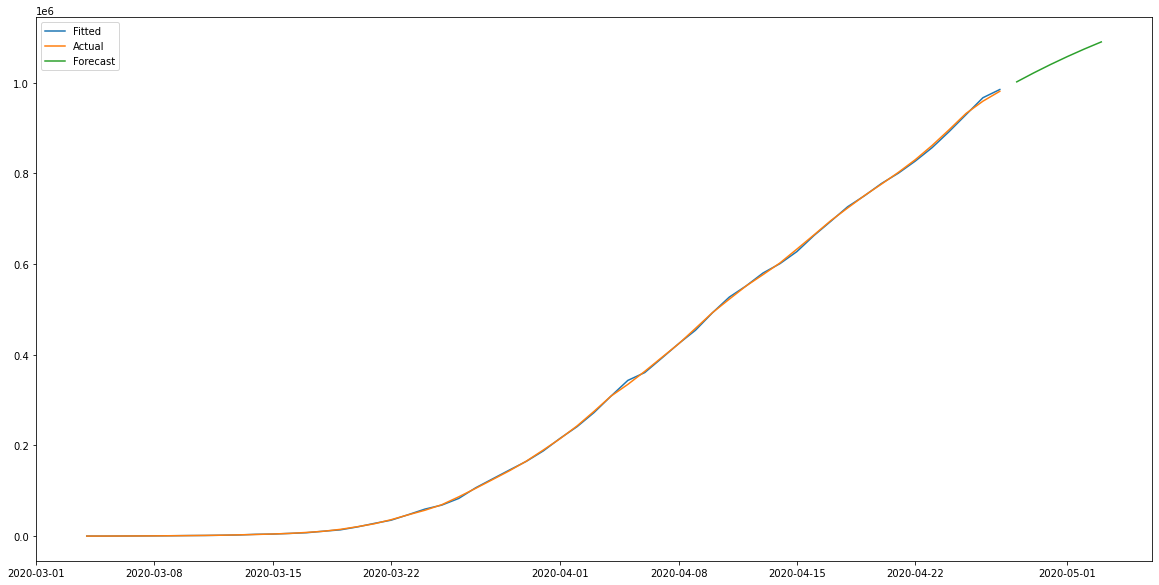

In [442]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(best_fit.fittedvalues, label="Fitted")
ax.plot(us_data['positive'], label="Actual")

ax.plot(best_fit.forecast(6), label="Forecast")
plt.legend()

#fit1.params_formatted

In [443]:
best_fit.forecast(6).index[-1]

Timestamp('2020-05-03 00:00:00', freq='D')

In [444]:
pd.to_datetime('2020-04-01') + pd.to_timedelta('1 day')

delta = end_date-start_date

delta.days

54

In [583]:
# Search for the best model params by backtesting 7-day
# forecasts.

#end_date = pd.to_datetime('20200420')
end_date = us_data.index[-1]

results = []
# Search through different model params
for t, d in [('mul', True), ('mul', False), ('add', True), ('add', False)]:
    pct_errors = list()
    # Backtest by fitting a model and producing a 6 day
    # forecast for every day in our history.
    for day_offset in range(1, delta.days-5):
        end_date = us_data.index[0] + pd.to_timedelta('%d day' % day_offset)
        es = hw.ExponentialSmoothing(
            us_data['positive'][(us_data.index <= end_date)],
            trend=t,
            freq='D',
            damped=d,
        )
        fit = es.fit()
        f = fit.forecast(6)
        # Get the actual number for the forecast day
        actual = us_data[us_data.index == f.index[-1]]['positive']
        # Calculate the percent error of the forecast
        pct_error = (f[-1]-actual[0])/actual[0]
        #pct_error = f[-1]-actual[0]
        #print("%s %s Actual: %d Forecast: %d Error: %.2f" % (end_date.strftime('%Y/%m/%d'), f.index[-1].strftime('%Y/%m/%d'), actual[0], f[-1], pct_error * 100))
        pct_errors.append(pct_error)
    results.append(((t,d),pct_errors))
    print(t,d)
    print(np.percentile((pct_errors[-30:]), q = [5, 10, 50, 90, 95]))
    

/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

mul True
[-0.17023697 -0.09815956 -0.00916391  0.10989601  0.18687328]


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

mul False
[-0.00171773  0.00738846  0.11077416  0.27779063  0.48701609]


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

add True
[-0.23908582 -0.16179393 -0.0267885   0.0281953   0.04188389]


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

add False
[-0.23894117 -0.16165915 -0.02669894  0.02827894  0.04201057]


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

[(0, 0.22642207821742058), (1, -0.2522500514451598), (2, -0.20244950897774028), (3, 0.2053245136703781), (4, 0.16432177377787732), (5, 0.07196447089325679), (6, -0.1308660969406123), (7, -0.08166584424539299), (8, -0.010449999877998006), (9, -0.024350571562597685), (10, 0.007857957551537731), (11, 0.10384870177838484), (12, 0.10077745851731566), (13, -0.09452550117765762), (14, -0.018212712790923735), (15, -0.007877812921187818), (16, -0.00557015635441284), (17, 0.018046195081807312), (18, 0.03101685031478235), (19, 0.010675141131486316), (20, -0.0017841897337224672), (21, -0.0319586109332982), (22, -0.044294783567424355), (23, -0.027926627916544922), (24, -0.002371332515776574), (25, 0.0035637357761167813), (26, -0.027376020972036202), (27, -0.041294271564557686), (28, -0.05620510764125211), (29, -0.048568535648954955)]
[(0, 0.6950942874794114), (1, 0.11820387866103936), (2, 0.17637018219571363), (3, 0.5330651941263295), (4, 0.43073384086705463), (5, 0.24622701353767004), (6, 0.115827

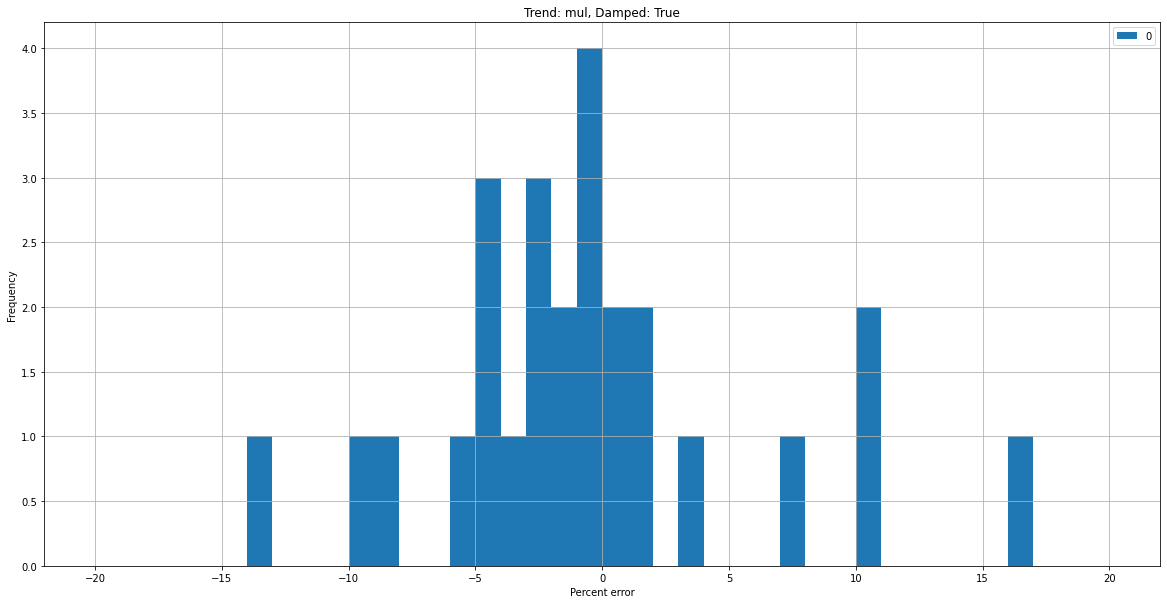

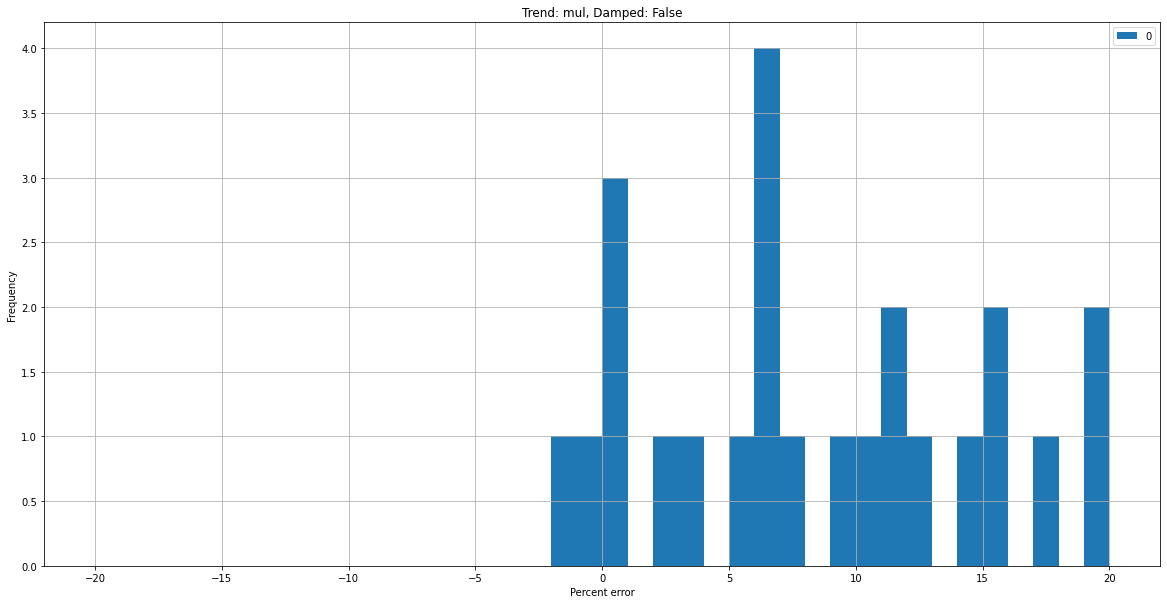

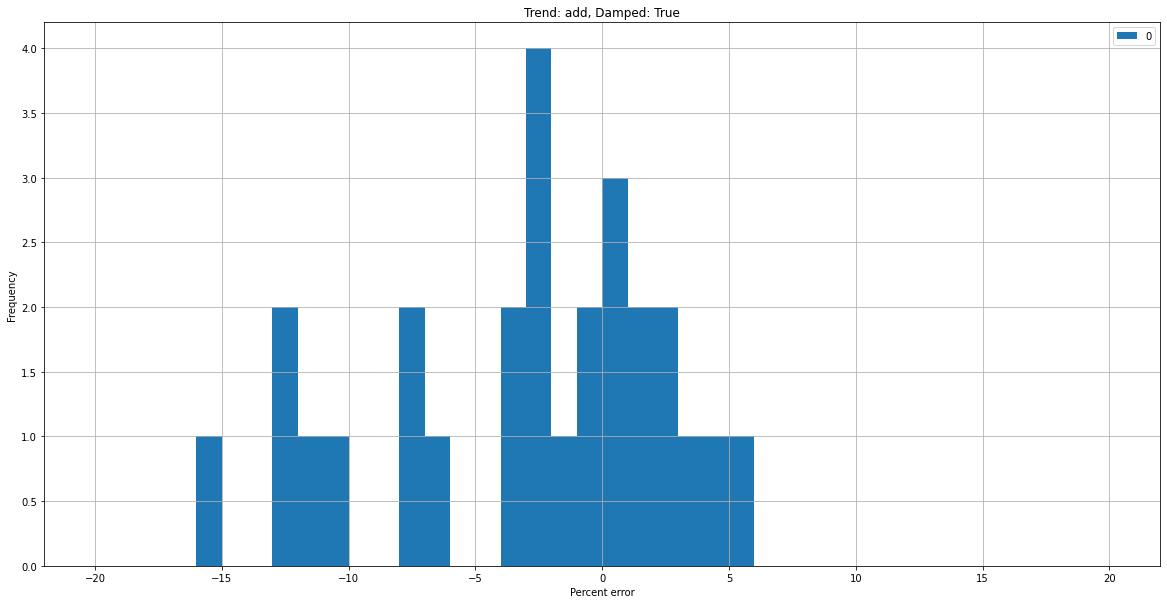

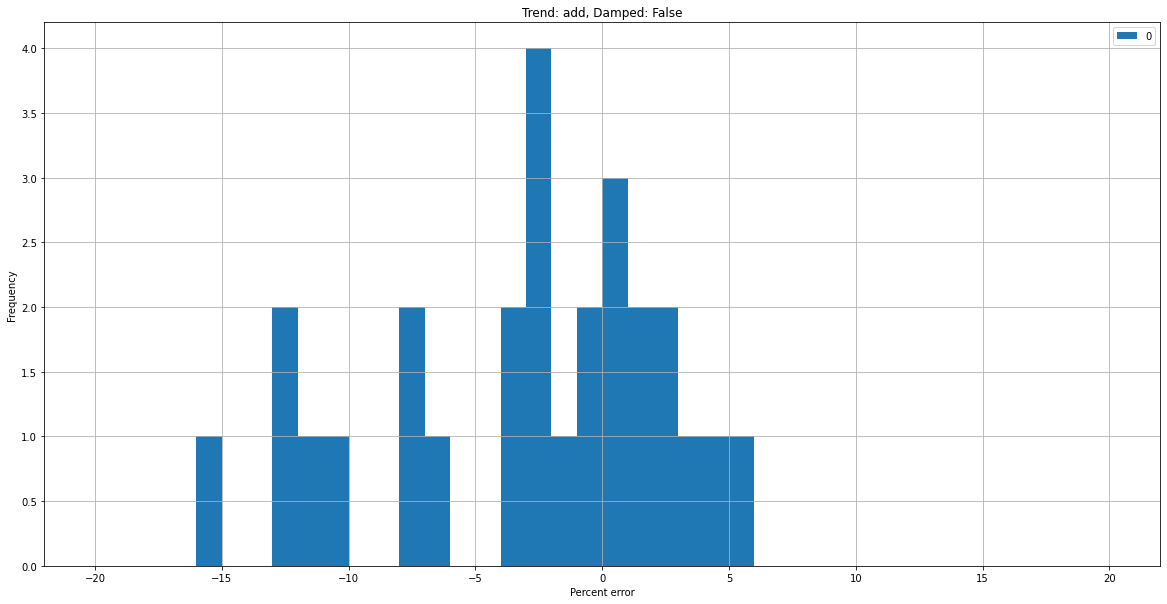

In [585]:
# Graph the histogram of percent errors over the backtested
# forecasts

for (p, errors) in results:
    errors_df = pd.DataFrame(errors)[-30:]
    print(list(enumerate(errors[-30:])))
    ax = (errors_df * 100).plot(
        kind='hist',
        bins=range(-20,21,1),
        title='Trend: %s, Damped: %s' % (p[0],p[1]),
        figsize=(20,10),
        grid=True
    )
    ax.set_xlabel('Percent error')
    plt.savefig("errors-%s-%s.png" % (p[0],p[1]))
    #print (p, errors)

In [401]:
for x in range(-100,101,1):
    print(x)

-100
-99
-98
-97
-96
-95
-94
-93
-92
-91
-90
-89
-88
-87
-86
-85
-84
-83
-82
-81
-80
-79
-78
-77
-76
-75
-74
-73
-72
-71
-70
-69
-68
-67
-66
-65
-64
-63
-62
-61
-60
-59
-58
-57
-56
-55
-54
-53
-52
-51
-50
-49
-48
-47
-46
-45
-44
-43
-42
-41
-40
-39
-38
-37
-36
-35
-34
-33
-32
-31
-30
-29
-28
-27
-26
-25
-24
-23
-22
-21
-20
-19
-18
-17
-16
-15
-14
-13
-12
-11
-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


2020-04-28    1.001893e+06
2020-04-29    1.021562e+06
2020-04-30    1.040171e+06
2020-05-01    1.057754e+06
2020-05-02    1.074346e+06
2020-05-03    1.089986e+06
Freq: D, dtype: float64


Dep. Variable:,endog,No. Observations:,55
Model:,ExponentialSmoothing,SSE,362529987.050
Optimized:,True,AIC,873.571
Trend:,Multiplicative,BIC,883.607
Seasonal:,None,AICC,875.954
Seasonal Periods:,None,Date:,"Tue, 28 Apr 2020"
Box-Cox:,False,Time:,02:17:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_slope,1.0000000,beta,True


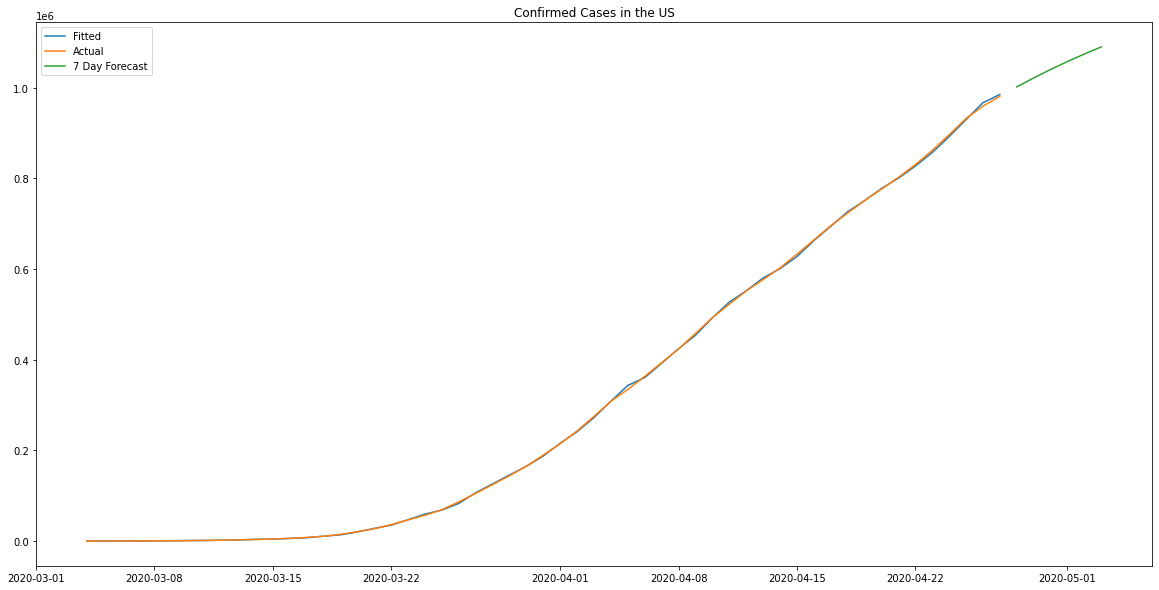

In [453]:
# 10 day forecast using multiplicative trend and dampening
es = hw.ExponentialSmoothing(
    us_data['positive'],
    trend='mul',
    freq='D',
    damped=True,
)
fit = es.fit(optimized=True)


fig, ax = plt.subplots(figsize=(20,10))

ax.plot(fit.fittedvalues, label="Fitted")
ax.plot(us_data['positive'], label="Actual")

ax.plot(fit.forecast(6), label="7 Day Forecast")
plt.title("Confirmed Cases in the US")
plt.yscale('linear')
plt.legend()

plt.savefig("us_7_day.png")

print(fit.forecast(6))
fit.summary()

In [426]:
lrt21 = fit.forecast(7)[pd.to_datetime('2020-05-03')]

(lrt21 * .95, lrt21, lrt21 * 1.05)

(1035384.1932079551, 1089878.098113637, 1144372.003019319)

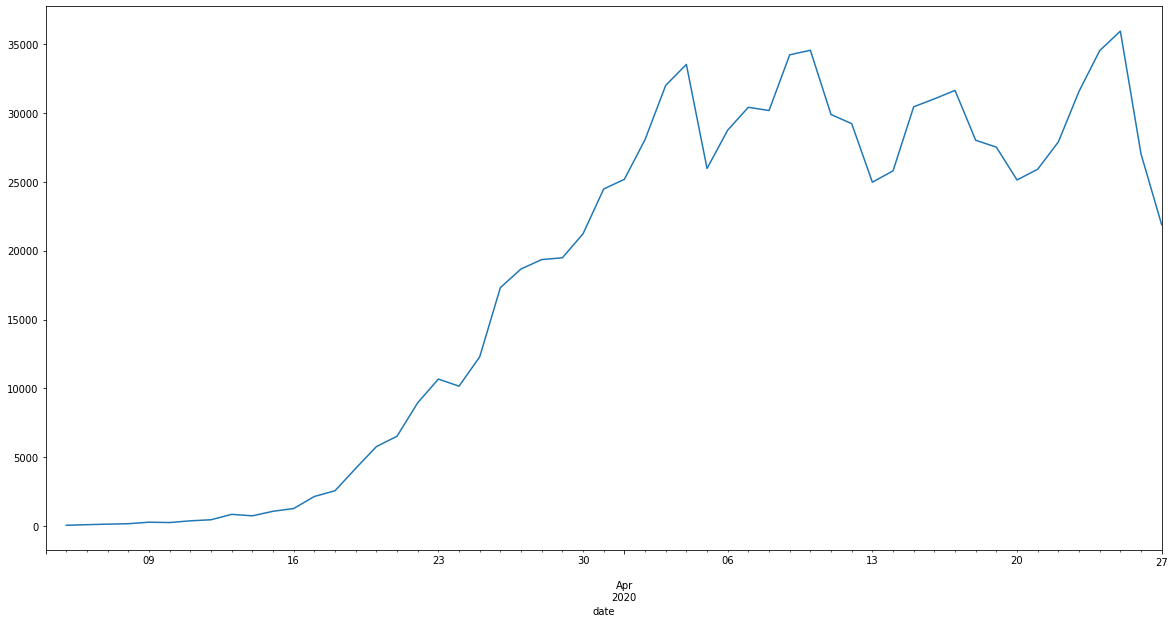

In [716]:
us_data['positive'].diff().plot(figsize=(20,10))

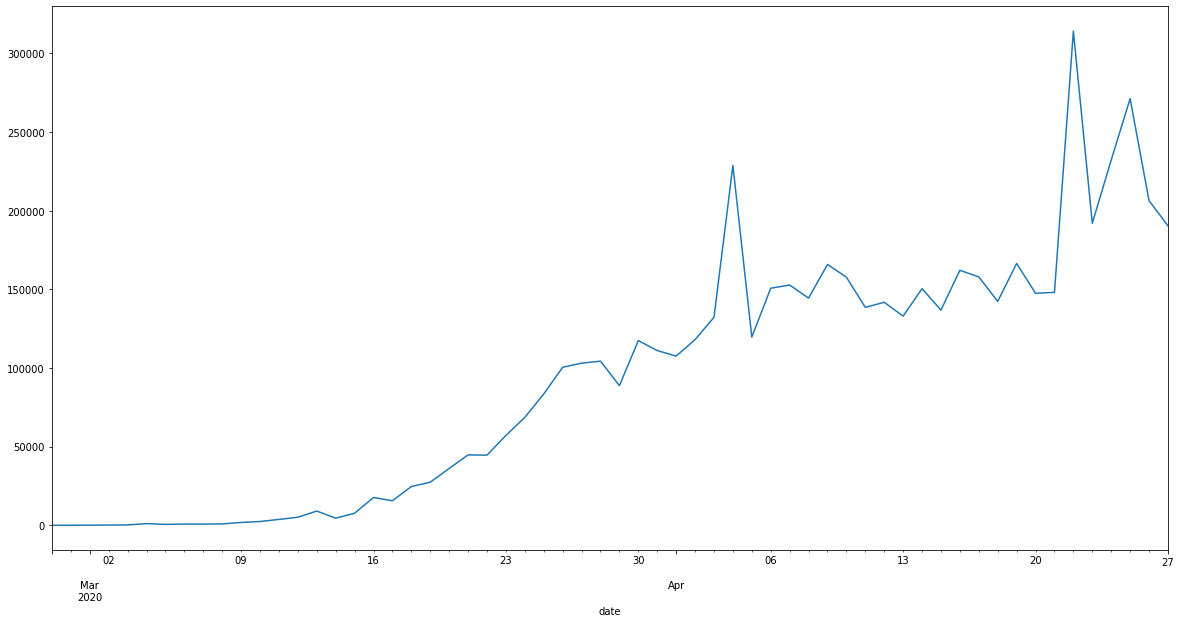

In [377]:
us_data['totalTestResultsIncrease'].plot(figsize=(20,10))

In [3]:
# Train 1 model per state, and create a forecast by
# summing the states.

state_data = pd.read_csv('../covid-tracking-data/data/states_daily_4pm_et.csv', index_col='date', parse_dates=['date'])[::-1]

start_date = pd.to_datetime("20200304")
end_date = pd.to_datetime("20200427")
#end_date = us_data.index[-1]
state_data = state_data[(state_data.index >= start_date) & (state_data.index <= end_date)]

In [4]:
# Remove AS because it has no cases. A multiplicative
# exponential smoothing model doesn't work with 0 values.
all_states = set(state_data.state.to_list()) - set(['AS'])

In [605]:
state_fits = {}
for state in all_states:
    print(state)
    single_state = state_data[(state_data['state'] == state) & (state_data['positive'] > 0)]
    es = hw.ExponentialSmoothing(
        single_state['positive'], #[(us_data.index <= end_date)],
        trend='mul',
        freq='D',
        damped=True,
    )
    fit = es.fit()
    print(fit.summary())
    f = fit.forecast(8)
    state_fits[state] = {'fit': fit, 'forecast': f}

IA
                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   48
Model:             ExponentialSmoothing   SSE                         245180.803
Optimized:                         True   AIC                            419.850
Trend:                   Multiplicative   BIC                            429.206
Seasonal:                          None   AICC                           422.650
Seasonal Periods:                  None   Date:                 Tue, 28 Apr 2020
Box-Cox:                          False   Time:                         04:01:19
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_slope            0.00

/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   45
Model:             ExponentialSmoothing   SSE                           6254.721
Optimized:                         True   AIC                            232.049
Trend:                   Multiplicative   BIC                            241.083
Seasonal:                          None   AICC                           235.076
Seasonal Periods:                  None   Date:                 Tue, 28 Apr 2020
Box-Cox:                          False   Time:                         04:01:20
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9772576                alpha                 True
smoothing_slope            0.97725

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   53
Model:             ExponentialSmoothing   SSE                         212470.670
Optimized:                         True   AIC                            449.702
Trend:                   Multiplicative   BIC                            459.554
Seasonal:                          None   AICC                           452.191
Seasonal Periods:                  None   Date:                 Tue, 28 Apr 2020
Box-Cox:                          False   Time:                         04:01:20
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9359406                alpha                 True
smoothing_slope            0.43833

/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   45
Model:             ExponentialSmoothing   SSE                          79576.057
Optimized:                         True   AIC                            346.501
Trend:                   Multiplicative   BIC                            355.535
Seasonal:                          None   AICC                           349.528
Seasonal Periods:                  None   Date:                 Tue, 28 Apr 2020
Box-Cox:                          False   Time:                         04:01:21
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9579922                alpha                 True
smoothing_slope            0.10688

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   53
Model:             ExponentialSmoothing   SSE                          34874.974
Optimized:                         True   AIC                            353.929
Trend:                   Multiplicative   BIC                            363.781
Seasonal:                          None   AICC                           356.418
Seasonal Periods:                  None   Date:                 Tue, 28 Apr 2020
Box-Cox:                          False   Time:                         04:01:22
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5700471                alpha                 True
smoothing_slope             0.0000

/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   48
Model:             ExponentialSmoothing   SSE                        1246822.393
Optimized:                         True   AIC                            497.916
Trend:                   Multiplicative   BIC                            507.272
Seasonal:                          None   AICC                           500.716
Seasonal Periods:                  None   Date:                 Tue, 28 Apr 2020
Box-Cox:                          False   Time:                         04:01:22
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_slope            1.00000

/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   50
Model:             ExponentialSmoothing   SSE                           2673.467
Optimized:                         True   AIC                            208.955
Trend:                   Multiplicative   BIC                            218.516
Seasonal:                          None   AICC                           211.622
Seasonal Periods:                  None   Date:                 Tue, 28 Apr 2020
Box-Cox:                          False   Time:                         04:01:23
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8966515                alpha                 True
smoothing_slope             0.0000

/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   46
Model:             ExponentialSmoothing   SSE                          17483.685
Optimized:                         True   AIC                            283.258
Trend:                   Multiplicative   BIC                            292.401
Seasonal:                          None   AICC                           286.205
Seasonal Periods:                  None   Date:                 Tue, 28 Apr 2020
Box-Cox:                          False   Time:                         04:01:23
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8421053                alpha                 True
smoothing_slope            0.84210

/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   53
Model:             ExponentialSmoothing   SSE                       91158607.428
Optimized:                         True   AIC                            770.964
Trend:                   Multiplicative   BIC                            780.816
Seasonal:                          None   AICC                           773.453
Seasonal Periods:                  None   Date:                 Tue, 28 Apr 2020
Box-Cox:                          False   Time:                         04:01:24
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_slope            1.00000

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   53
Model:             ExponentialSmoothing   SSE                        2721244.030
Optimized:                         True   AIC                            584.854
Trend:                   Multiplicative   BIC                            594.706
Seasonal:                          None   AICC                           587.343
Seasonal Periods:                  None   Date:                 Tue, 28 Apr 2020
Box-Cox:                          False   Time:                         04:01:25
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_slope             0.0000

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   53
Model:             ExponentialSmoothing   SSE                        1804660.882
Optimized:                         True   AIC                            563.086
Trend:                   Multiplicative   BIC                            572.938
Seasonal:                          None   AICC                           565.575
Seasonal Periods:                  None   Date:                 Tue, 28 Apr 2020
Box-Cox:                          False   Time:                         04:01:26
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_slope             0.0000

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   51
Model:             ExponentialSmoothing   SSE                         358576.792
Optimized:                         True   AIC                            461.762
Trend:                   Multiplicative   BIC                            471.421
Seasonal:                          None   AICC                           464.366
Seasonal Periods:                  None   Date:                 Tue, 28 Apr 2020
Box-Cox:                          False   Time:                         04:01:27
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_slope            0.79876

2020-04-26    9.651431e+05
2020-04-27    9.974228e+05
2020-04-28    1.028710e+06
2020-04-29    1.059022e+06
2020-04-30    1.088384e+06
2020-05-01    1.116827e+06
2020-05-02    1.144391e+06
2020-05-03    1.171116e+06
Freq: D, dtype: float64

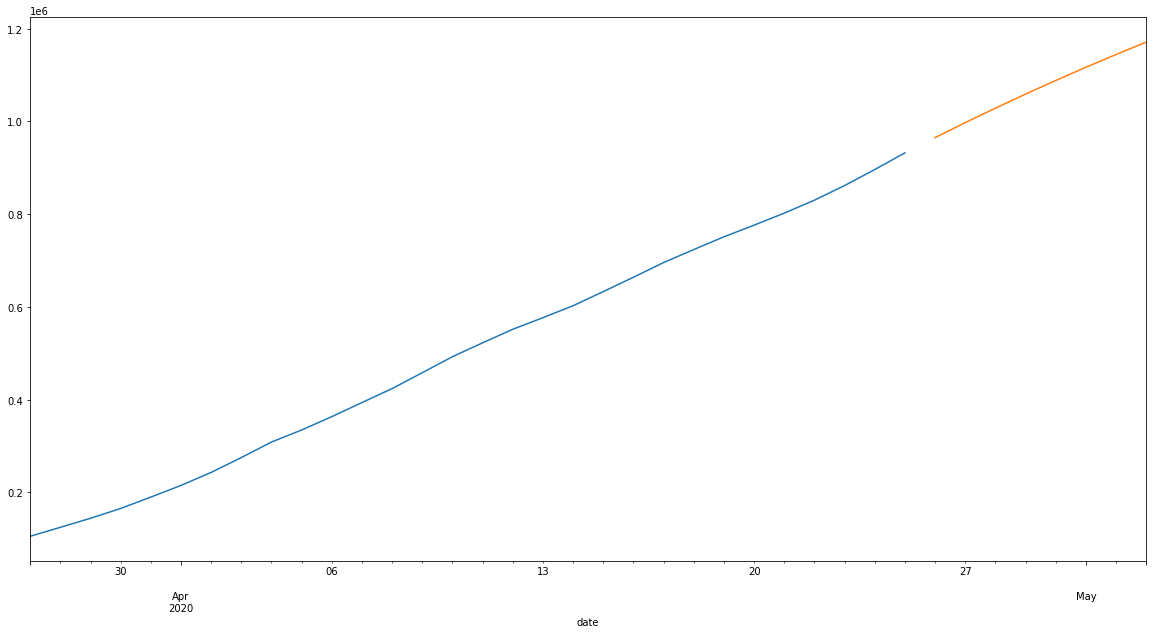

In [606]:
states = list(state_fits.keys())

sum_of_states = state_fits[states[0]]['forecast'].copy()

for k in states[1:]:
    sum_of_states += state_fits[k]['forecast']

us_data.iloc[-30:]['positive'].plot()
sum_of_states.plot(figsize=(20,10))
sum_of_states

In [572]:
# Backtest the per-state model on 6 day forecasts

start_date = pd.to_datetime('2020-03-15')
last_forecast = pd.to_datetime('2020-04-27')
forecast_length = pd.to_timedelta('6 day')

pct_errors = []
for day_offset in range(1, ((last_forecast - forecast_length) - start_date).days):
        print(day_offset)
        end_date = start_date + pd.to_timedelta('%d day' % day_offset)
        us_prediction = 0.0
        for state in all_states:
            prediction_day = end_date + forecast_length
            single_state = state_data[(state_data['state'] == state) & (state_data['positive'] > 0) & (state_data.index <= end_date)]
            try:
                es = hw.ExponentialSmoothing(
                    single_state['positive'],
                    trend='mul',
                    freq='D',
                    damped=True,
                )
                fit = es.fit()
                f = fit.forecast(6)
                try:
                    prediction = f[prediction_day]
                    us_prediction += prediction
                except KeyError:
                    pass
            except IndexError:
                pass
                
        total_error = (us_prediction - us_data.loc[prediction_day]['positive'])
        pct_error = total_error / us_data.loc[prediction_day]['positive']
        pct_errors.append(pct_error)

1


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

2


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

3


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

4


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

5


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

6


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

7


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

8


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

9


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

10


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

11


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

12


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

13


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

14


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

15


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

16


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

17


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

18


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

19


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

20


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

21


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

22


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

23


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

24


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

25


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

26


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

27


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

28


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

29


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

30


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

31


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

32


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

33


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

34


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

35


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

36


/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization

0.6333333333333333

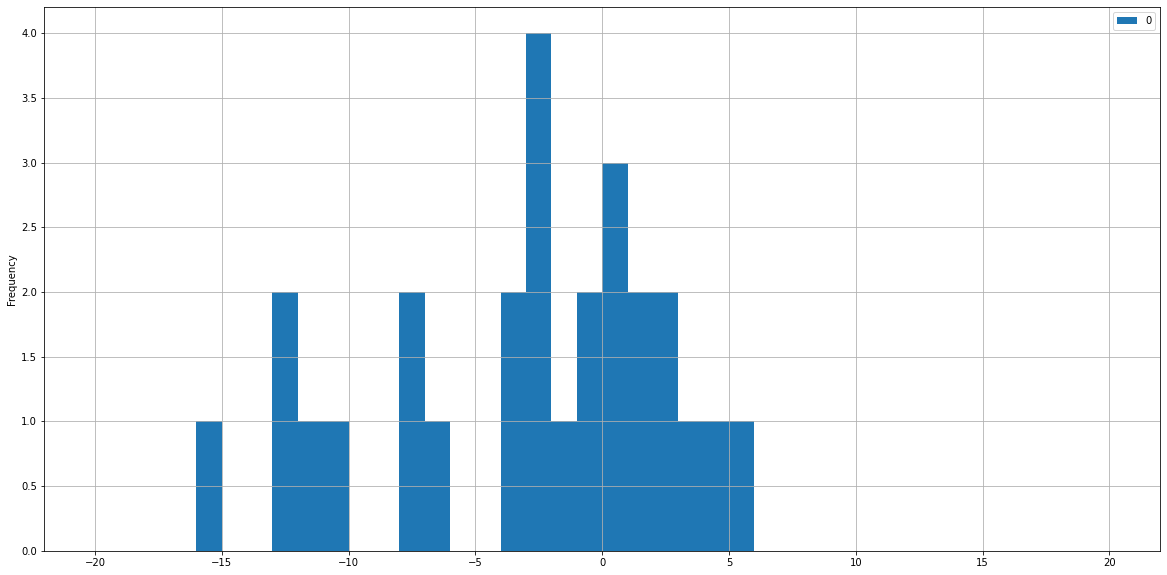

In [587]:
pd.DataFrame(pct_errors[-30:]).apply(lambda x : x*100).plot(
        kind='hist',
        bins=range(-20,21,1),
        figsize=(20,10),
        grid=True)
len(pct_errors)

19/30

In [582]:
(1.110988e+06 * .95, 1.110988e+06, 1.110988e+06 * 1.05)

(1055438.5999999999, 1110988.0, 1166537.4000000001)

In [718]:
print("Each state %f" % ((1.110988e+06 - 959258)/6))
print("Linear %f" % ((1161382 - 959258)/6))
print("Nation: %f" % ((1.089986e+06 - 959258)/6))

final = (1161382 + 1.110988e+06)/2

print("Avg: %f" % ((1136185-959258)/6))

(final * .95, final, final * 1.05)

(final- 959258)/6

Each state 25288.333333
Linear 33687.333333
Nation: 21788.000000
Avg: 29487.833333


29487.833333333332

In [476]:
list(state_fits.keys())[1:]

['MP',
 'DC',
 'NM',
 'DE',
 'OK',
 'ND',
 'ID',
 'WV',
 'KY',
 'NE',
 'CA',
 'WA',
 'NV',
 'MS',
 'MD',
 'MA',
 'OR',
 'WI',
 'UT',
 'NH',
 'VA',
 'OH',
 'PA',
 'MN',
 'MT',
 'PR',
 'HI',
 'CO',
 'SD',
 'NC',
 'VT',
 'NY',
 'AR',
 'TX',
 'GU',
 'LA',
 'SC',
 'GA',
 'AL',
 'NJ',
 'KS',
 'RI',
 'FL',
 'MI',
 'AZ',
 'AK',
 'ME',
 'VI',
 'CT',
 'IN',
 'WY',
 'IL',
 'TN',
 'MO']

In [5]:
def fit(x, y, target_date, days_back, f, p0, title, backtest_date=None):
    
    if backtest_date is not None:
        # If we're doing a backtest, truncate the data.
        last_day = pd.Timestamp(backtest_date).to_julian_date() - us_data.index[0].to_julian_date()
        backtest_x = x[:int(last_day)]
        backtest_y = y[:int(last_day)]
    else:
        backtest_x = x
        backtest_y = y

    target = pd.Timestamp(target_date).to_julian_date() - us_data.index[0].to_julian_date()

    plt.figure(figsize=(20,10))

    predictions = []
    params=p0
    for n_days_back in days_back:
        params, _ = curve_fit(f, backtest_x[-n_days_back:], backtest_y[-n_days_back:], p0=params, maxfev=10000)
        x_projection = np.linspace(backtest_x[-n_days_back],target,100)
        plt.plot(x_projection, f(x_projection, *params), label="Last %d Days" % n_days_back, linestyle='dashed')
        prediction = f(target, *params)
        print("Prediction fitting on %d days back: %d" % (n_days_back, prediction))
        predictions.append(prediction)
    print("Average prediction: %d" % np.average(predictions))
    if backtest_date is not None:
        error = np.average(predictions) - y[int(target)]
        print("Distance from actual: %d" % error)
    plt.plot(x, y, label="Actual", linewidth=3)
    plt.legend()
    plt.title(title)
    plt.yscale('linear')
    plt.show()

Prediction fitting on 25 days back: 1570124
Prediction fitting on 20 days back: 1559988
Prediction fitting on 15 days back: 1564046
Prediction fitting on 10 days back: 1570929
Prediction fitting on 5 days back: 1513114
Prediction fitting on 2 days back: 1481193
Average prediction: 1543233


/home/beala/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


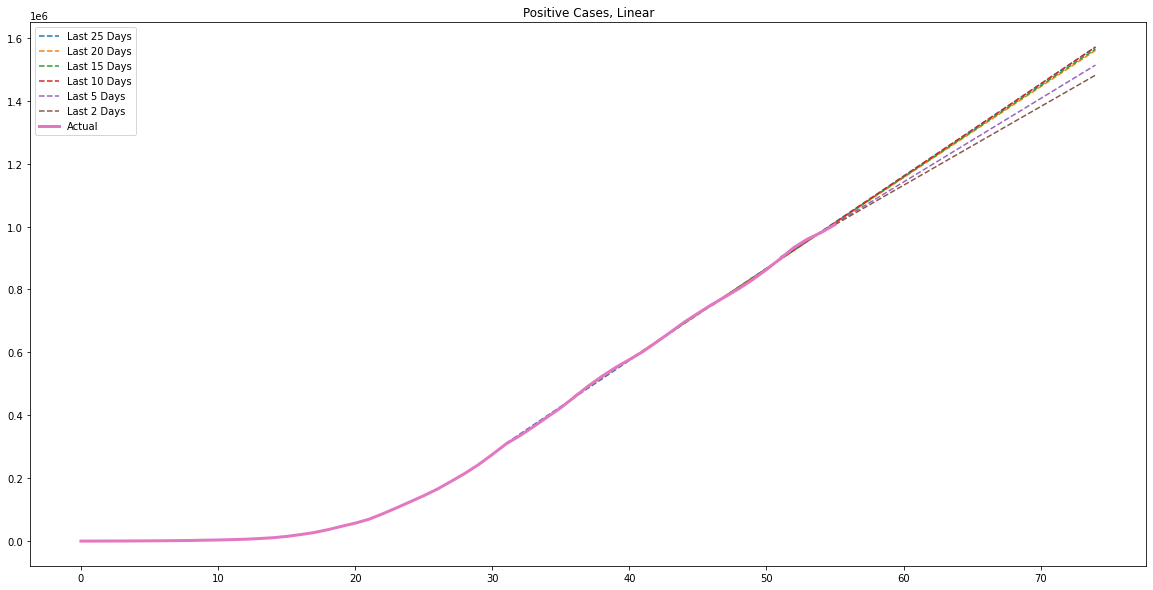

In [7]:
us_data['days_since_start'] = us_data.index.to_julian_date() - us_data.index[0].to_julian_date()

def f(x, *coeffs):
   return np.polyval(coeffs, x)

fit(us_data['days_since_start'],
    us_data['positive'],
    '2020-05-17',
    (25, 20, 15, 10, 5, 2),
    f,
    np.ones(2),
    "Positive Cases, Linear")

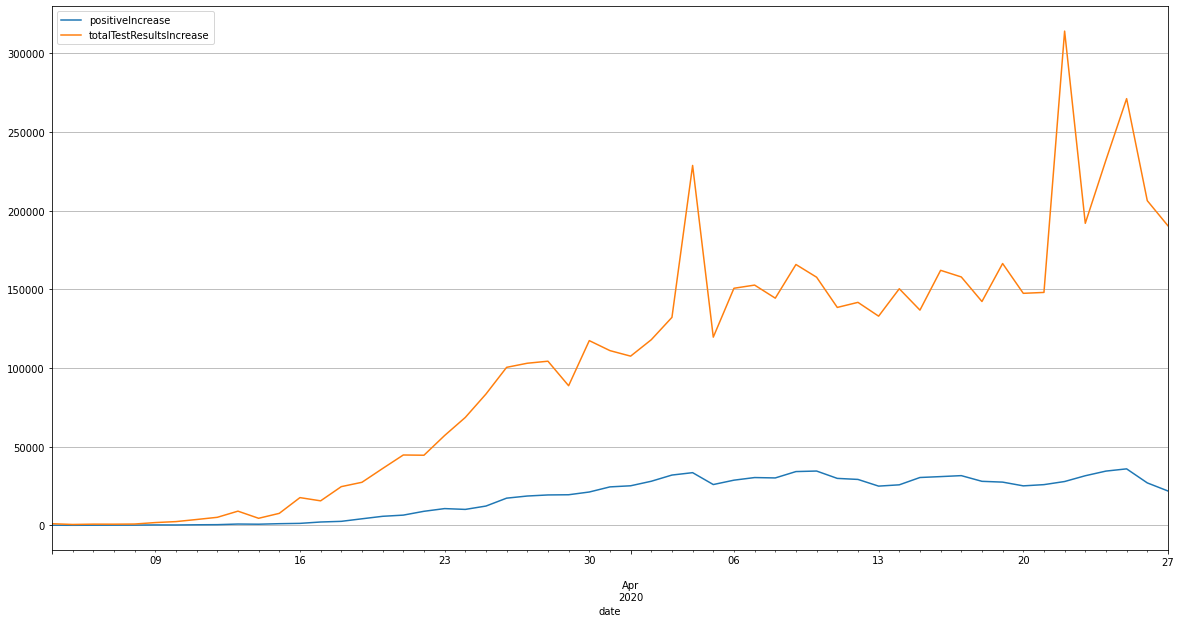

In [719]:
us_data['positiveIncrease'].plot(figsize=(20,10))
us_data['totalTestResultsIncrease'].plot(figsize=(20,10))

plt.grid(axis='y')
plt.legend()
#Each state 25288.333333
#Linear 33687.333333
#Nation: 21788.000000
#Avg: 29487.833333

In [621]:
us_state

NameError: name 'us_state' is not defined

     April 2020       
Su Mo Tu We Th Fr Sa  
          1  2  3  4  
 5  6  7  8  9 10 11  
12 13 14 15 16 17 18  
19 20 21 22 23 24 25  
26 27 28 29 30        
                      


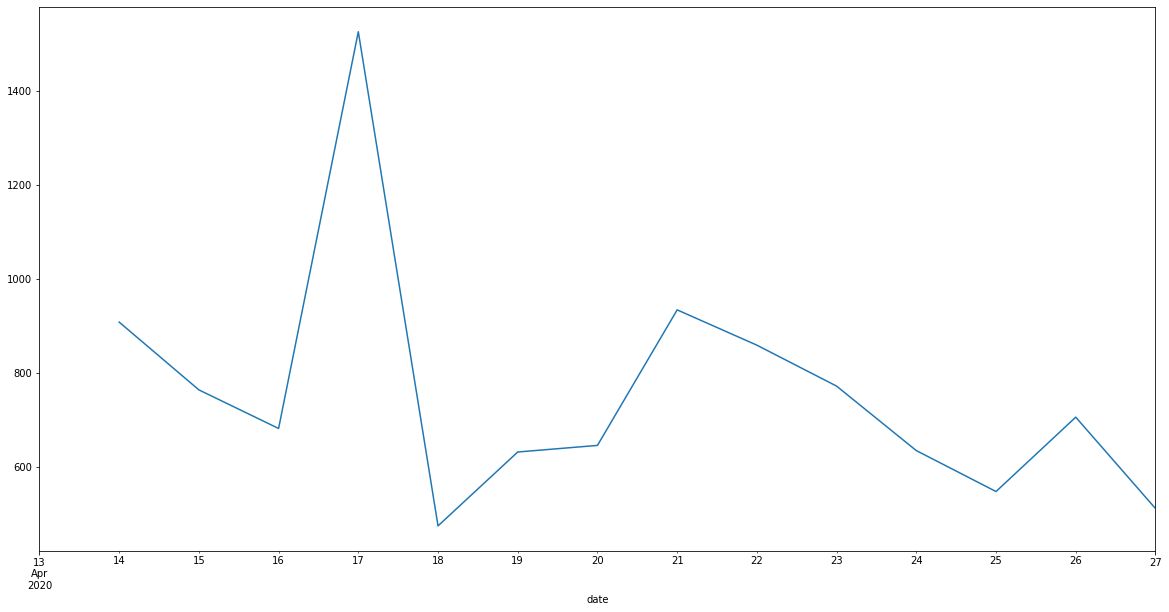

In [707]:
!cal April 2020

start_date = pd.to_datetime('2020-04-13')
end_date = pd.to_datetime('2020-04-27')
date_range = (state_data.index >= start_date) & (state_data.index <= end_date)
last_two_weeks = state_data[(state_data['state'] == 'GA') & (date_range)]['positive'].diff()
last_two_weeks.plot(figsize=(20,10))

In [709]:
last_two_weeks.mean()

757.0

In [708]:
last_two_weeks[-7:].mean()

709.4285714285714

In [704]:
state_data[(state_data['state'] == 'GA')].diff().plot(figsize=(20,10))

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [646]:
ga_avg_daily = state_data[state_data['state'] == 'GA']['positive'][-15:].diff().mean()

In [638]:
ga_avg_daily * np.power(1.04, 14/6.0)

781.9714645514268

In [647]:
ga_avg_daily * np.power(1.04, 20/6.0)

857.6804758159618

In [659]:
np.sqrt(ga_avg_daily * np.power(0.8, 14/6.0) * ga_avg_daily * np.power(0.8, 20/6.0))

399.916530567324

In [652]:
np.sqrt(ga_avg_daily * np.power(1.3, 14/6.0) * ga_avg_daily * np.power(1.3, 20/6.0))

1582.658536113647

In [656]:
750-1200

(750+1500)/2

625.0

In [657]:
np.sqrt(750*1500)

1060.6601717798212

In [ ]:
ga_avg_daily * np.power(1.3, 20/6.0)

773-302

In [660]:
773-302

471

In [662]:
471*.008

3.7680000000000002

In [685]:
ban_lifted = pd.to_datetime('20200427')

start_of_week = pd.to_datetime('20200510')
end_of_week = pd.to_datetime('20200516')

low_rt = 0.9
high_rt = 1.2
delta = end_of_week - start_of_week

weekly_sum_low = 0
weekly_sum_high = 0
for i in range(0,delta.days+1):
    day_offset = (pd.to_timedelta("%d days" % i))
    days = start_of_week - ban_lifted + day_offset
    print(days, start_of_week + day_offset)
    weekly_sum_low += ga_avg_daily * np.power(low_rt, days.days/6.0)
    weekly_sum_high += ga_avg_daily * np.power(high_rt, days.days/6.0)
    
print("Rt = %f: %f" % (low_rt, weekly_sum_low/7))
print("Rt = %f: %f" % (high_rt, weekly_sum_high/7))

print("Average: %f" % np.average([weekly_sum_high/7, weekly_sum_low/7]))

13 days 00:00:00 2020-05-10 00:00:00
14 days 00:00:00 2020-05-11 00:00:00
15 days 00:00:00 2020-05-12 00:00:00
16 days 00:00:00 2020-05-13 00:00:00
17 days 00:00:00 2020-05-14 00:00:00
18 days 00:00:00 2020-05-15 00:00:00
19 days 00:00:00 2020-05-16 00:00:00
Rt = 0.900000: 568.585202
Rt = 1.200000: 1226.025300
Average: 897.305251


968.0